# Relatório de Análise IX

## Identificando e Removendo Outliers

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14,6))

In [2]:
dados = pd.read_csv("dados/aluguel_residencial.csv", sep = ';')

<Axes: >

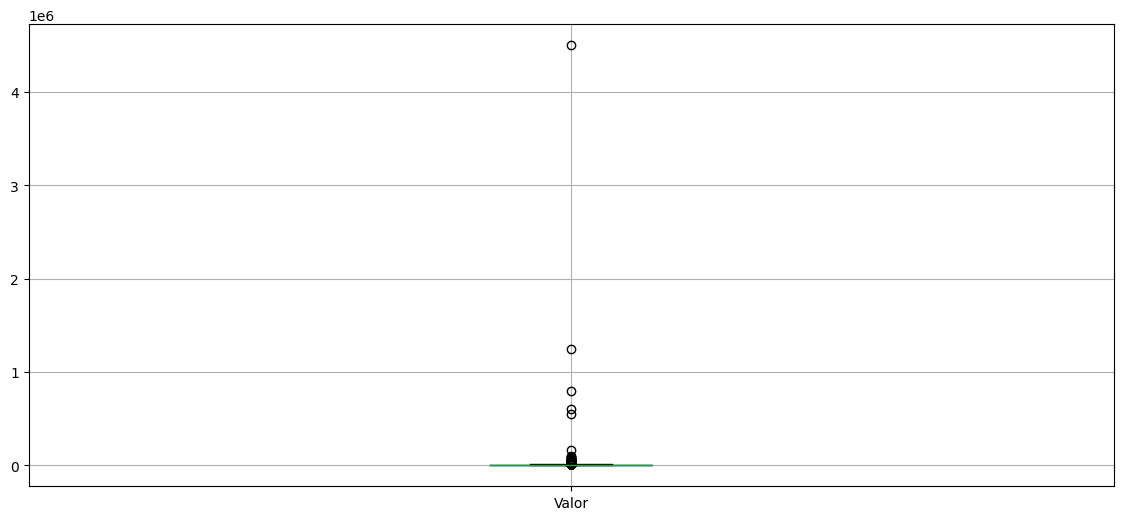

In [3]:
dados.boxplot(['Valor'])

In [4]:
dados[dados['Valor'] >= 500000]


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
7629,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0
10636,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0
12661,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0
13846,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0
15520,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0


<img src = "img/compressed_box-plot.png">

In [5]:
valor = dados['Valor']

In [8]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ
print(limite_superior)

11350.0


In [9]:
selecao = (valor >=limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

array([[<Axes: title={'center': 'Valor'}>]], dtype=object)

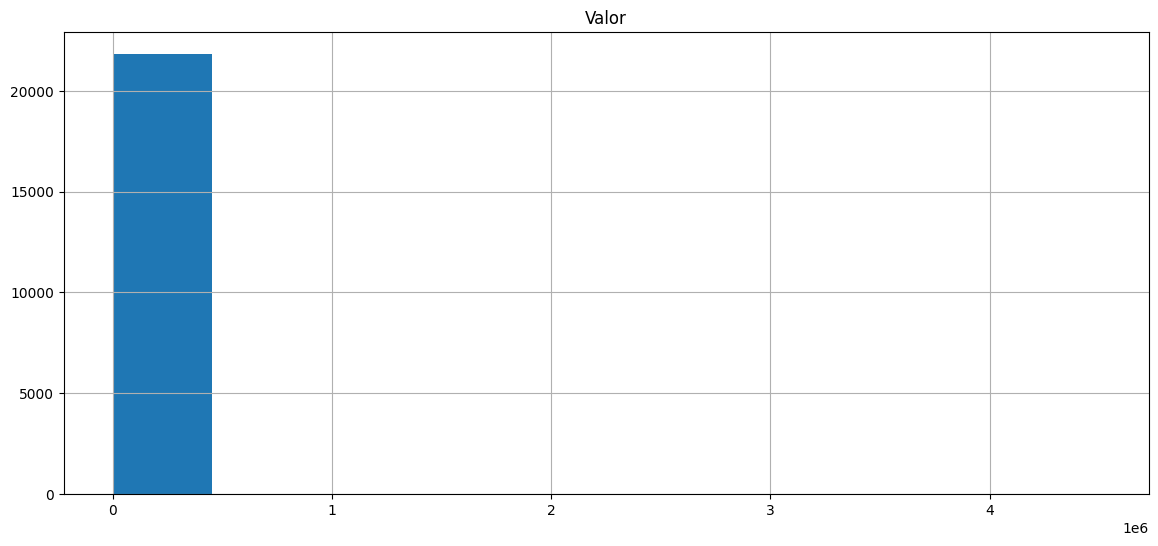

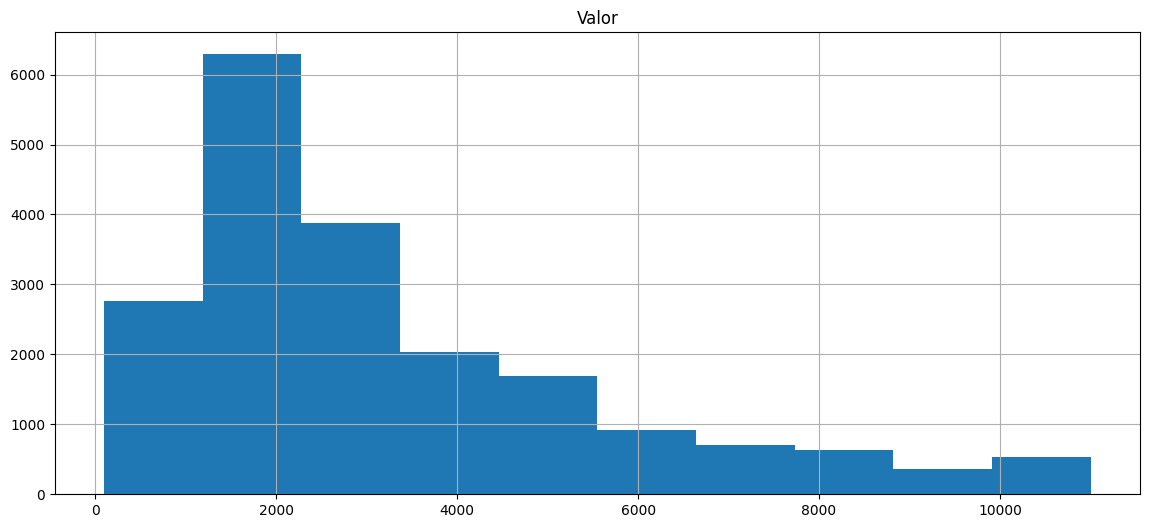

In [10]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])

<Axes: >

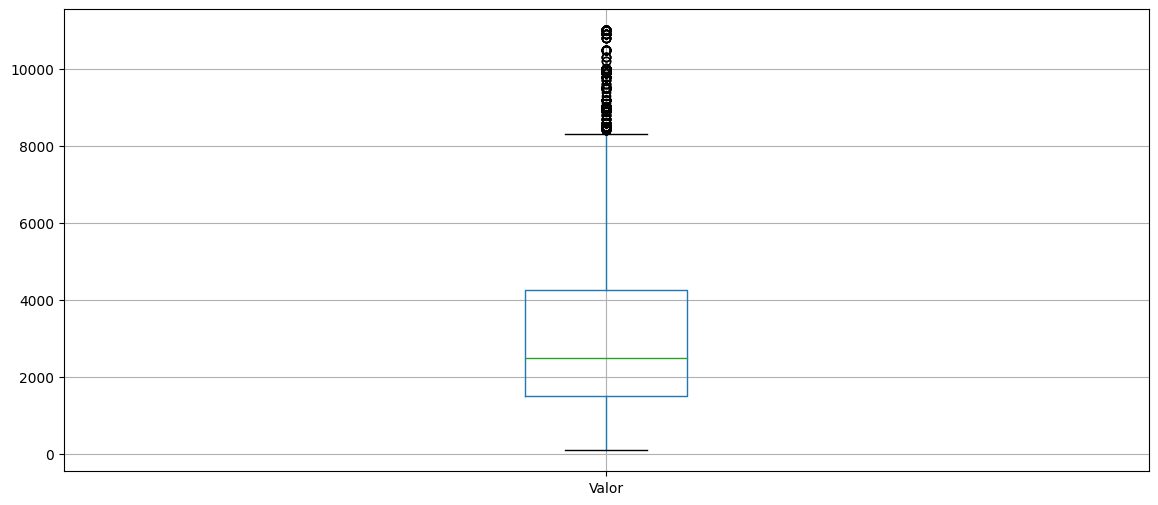

In [11]:
dados_new.boxplot('Valor')

In [12]:
valor = dados_new['Valor']
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ
print(limite_superior)

8375.0


In [13]:
imoveis_alto_nivel = dados_new[dados_new.Valor >= limite_superior]

In [14]:
imoveis_alto_nivel

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
24,Apartamento,Copacabana,3,1,2,378,10000.0,2150.0,700.0
114,Apartamento,Ipanema,2,0,2,52,10000.0,3689.0,393.0
154,Apartamento,Laranjeiras,5,2,1,400,9000.0,3000.0,0.0
186,Apartamento,Barra da Tijuca,4,3,3,160,8600.0,2300.0,250.0
194,Apartamento,Copacabana,5,1,3,390,10000.0,1000.0,1000.0
...,...,...,...,...,...,...,...,...,...
21757,Apartamento,Barra da Tijuca,3,3,3,160,8500.0,2300.0,345.0
21758,Apartamento,Barra da Tijuca,3,3,3,266,8900.0,3500.0,480.0
21767,Apartamento,Lagoa,3,2,1,200,10000.0,1479.0,800.0
21785,Apartamento,Leblon,2,1,1,90,10500.0,23511.0,352.0


<Axes: >

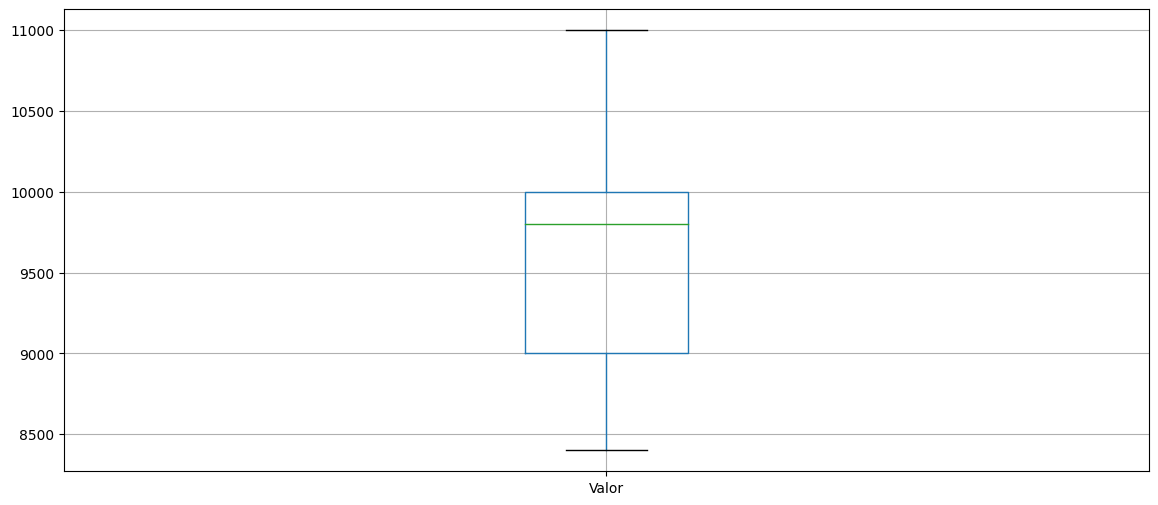

In [15]:
imoveis_alto_nivel.boxplot('Valor')

In [16]:
exercicio = pd.read_csv('dados/aluguel_amostra.csv', sep = ";")

In [17]:
exercicio

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Recreio dos Bandeirantes,3,2,1,320,3200.0,1319.0,0.0,10.00,Apartamento
1,Apartamento,Maracanã,2,0,0,59,800.0,725.0,47.0,13.56,Apartamento
2,Apartamento,Leblon,3,2,1,147,7500.0,1000.0,381.0,51.02,Apartamento
3,Apartamento,São Conrado,3,3,3,270,14999.0,2800.0,1200.0,55.55,Apartamento
4,Apartamento,Tijuca,2,1,0,65,1200.0,640.0,97.0,18.46,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
9995,Apartamento,Copacabana,3,1,2,160,15500.0,1600.0,435.0,96.88,Apartamento
9996,Apartamento,Copacabana,4,0,0,190,6000.0,1000.0,0.0,31.58,Apartamento
9997,Apartamento,Barra da Tijuca,2,1,1,70,2800.0,750.0,160.0,40.00,Apartamento
9998,Apartamento,Tijuca,1,0,0,50,1700.0,360.0,20.0,34.00,Apartamento


In [20]:
valor = exercicio["Valor m2"]
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ
print(Q1.round(2),Q3.round(2), IIQ.round(2), limite_inferior.round(2), limite_superior.round(2))

21.25 42.31 21.06 -10.34 73.9


<Axes: title={'center': 'Valor'}, xlabel='[Tipo]'>

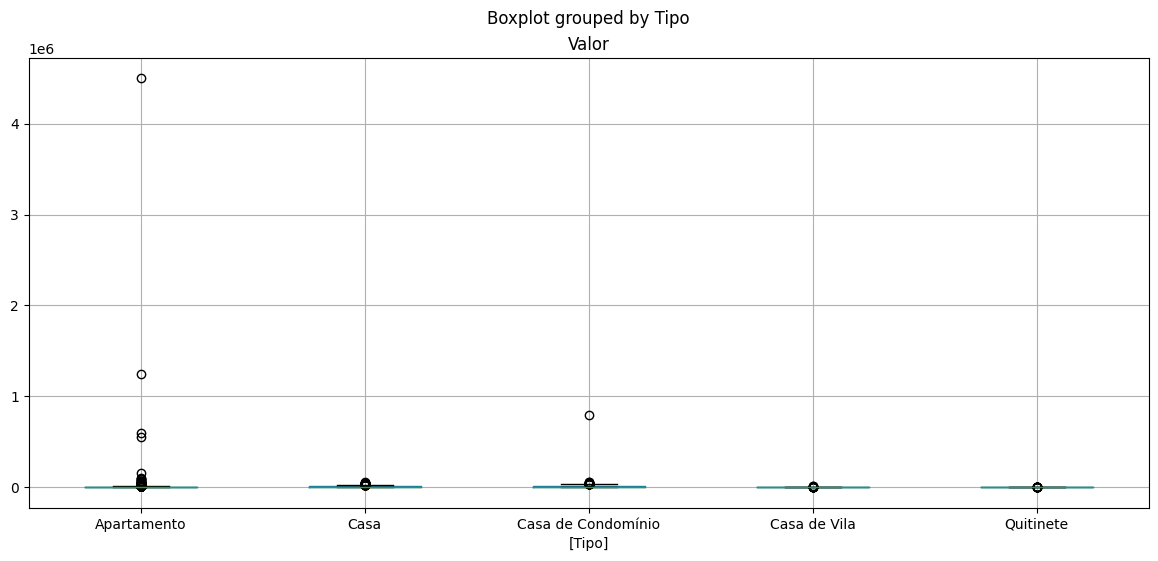

In [21]:
dados.boxplot('Valor', by = ['Tipo'])

In [22]:
grupo_tipo = dados.groupby('Tipo')['Valor']

In [33]:
grupo_tipo.groups.keys()

dict_keys(['Apartamento', 'Casa', 'Casa de Condomínio', 'Casa de Vila', 'Quitinete'])

In [26]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ


In [28]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    is_tipo = dados['Tipo'] == tipo
    is_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = is_tipo & is_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao], axis = 0)

<Axes: title={'center': 'Valor'}, xlabel='Tipo'>

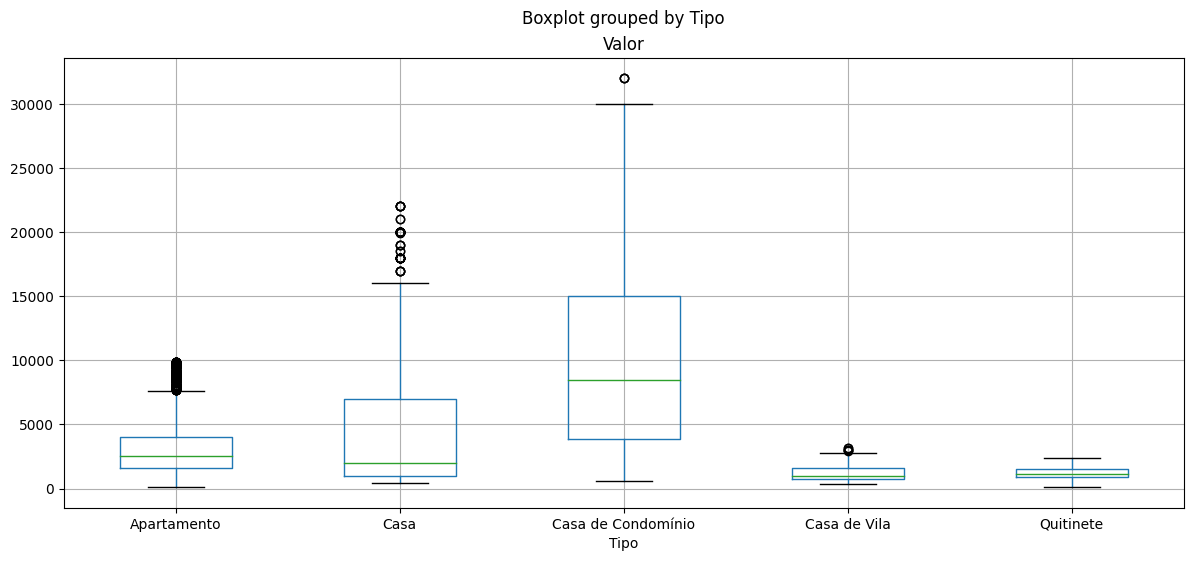

In [31]:
dados_new.boxplot('Valor', by = 'Tipo')

In [32]:
dados_new

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
...,...,...,...,...,...,...,...,...,...
21687,Quitinete,Glória,1,0,0,10,400.0,107.0,10.0
21728,Quitinete,Flamengo,1,0,0,23,900.0,605.0,0.0
21748,Quitinete,Centro,1,0,0,24,1100.0,323.0,0.0
21815,Quitinete,Copacabana,1,0,0,22,1500.0,286.0,200.0


In [34]:
dados_new.to_csv("dados/aluguel_residencial_sem_outlier.csv", sep = ';')